# **Naïve Bayes**

## Inspecting the dataset

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "final_cleaned_oscars.csv"
df = pd.read_csv(file_path)

df.head()

,Year,Category,Film,Film_ID,Nominee,Winner,TMDb_ID,Popularity,Vote_Average,Genres,Director,IMDb_Rating
0,1972,Best Cinematography,1776,tt0068156,"Harry Stradling, Jr.",False,14902,6.8,6.8,"Drama, History, Musical",Peter H. Hunt,7.2
1,2019,Best Cinematography,1917,tt8579674,Roger Deakins,True,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
2,2019,Best Director,1917,tt8579674,Sam Mendes,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
3,2019,Best Picture,1917,tt8579674,"Sam Mendes, Pippa Harris, Jayne-Ann Tenggren a...",False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
4,2019,Best Original Screenplay,1917,tt8579674,Written by Sam Mendes & Krysty Wilson-Cairns,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2


## Cleaning the dataset

In [2]:
df_nb = df[['Winner', 'Category', 'Genres', 'Director','Popularity']].copy()
df_nb.dropna(inplace=True)

df_nb.to_csv('nb_cleaned.csv', index=False)
df_nb.head()

,Winner,Category,Genres,Director,Popularity
0,False,Best Cinematography,"Drama, History, Musical",Peter H. Hunt,6.8
1,True,Best Cinematography,"Action, Drama, War",Sam Mendes,46.0
2,False,Best Director,"Action, Drama, War",Sam Mendes,46.0
3,False,Best Picture,"Action, Drama, War",Sam Mendes,46.0
4,False,Best Original Screenplay,"Action, Drama, War",Sam Mendes,46.0


## Encoding categorical features

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le_category = LabelEncoder()
le_genres = LabelEncoder()
le_director = LabelEncoder()

df_nb['Category'] = le_category.fit_transform(df_nb['Category'])
df_nb['Genres'] = le_genres.fit_transform(df_nb['Genres'])
df_nb['Director'] = le_director.fit_transform(df_nb['Director'])

df_nb.to_csv('nb_encoded.csv', index=False)
df_nb.head()

,Winner,Category,Genres,Director,Popularity
0,False,3,173,562,6.8
1,True,3,30,656,46.0
2,False,4,30,656,46.0
3,False,6,30,656,46.0
4,False,5,30,656,46.0


## Splitting data into features (X) and target (y)

The data is split into disjoint training and testing sets (70/30), and each set is saved for transparency and reproducibility. The target variable is `Winner`, and features are numeric or encoded.

In [4]:
from sklearn.model_selection import train_test_split

X = df_nb.drop('Winner', axis=1)
y = df_nb['Winner']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Saving the datasets

In [5]:
train_df = X_train.copy()
train_df['Winner'] = y_train

test_df = X_test.copy()
test_df['Winner'] = y_test

train_df.to_csv('nb_train_data.csv', index=False)
test_df.to_csv('nb_test_data.csv', index=False)

## Multinomial Naïve Bayes:

In [6]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))

MultinomialNB Accuracy: 0.7783171521035599
[[952  46]
 [228  10]]
              precision    recall  f1-score   support

       False       0.81      0.95      0.87       998
        True       0.18      0.04      0.07       238

    accuracy                           0.78      1236
   macro avg       0.49      0.50      0.47      1236
weighted avg       0.69      0.78      0.72      1236



**Confusion Matrix for MultinomialNB:**

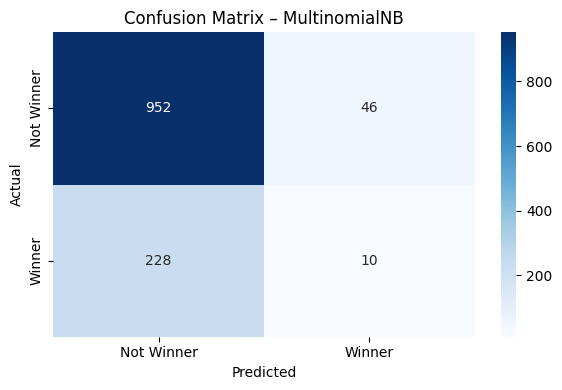

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_mnb = confusion_matrix(y_test, y_pred_mnb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Winner", "Winner"],
            yticklabels=["Not Winner", "Winner"])
plt.title("Confusion Matrix – MultinomialNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Bernoulli Naïve Bayes

In [8]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer

binarizer = Binarizer()
X_train_bin = binarizer.fit_transform(X_train)
X_test_bin = binarizer.transform(X_test)

bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train)
y_pred_bnb = bnb.predict(X_test_bin)

print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))

BernoulliNB Accuracy: 0.8074433656957929
              precision    recall  f1-score   support

       False       0.81      1.00      0.89       998
        True       0.00      0.00      0.00       238

    accuracy                           0.81      1236
   macro avg       0.40      0.50      0.45      1236
weighted avg       0.65      0.81      0.72      1236



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Confusion Matrix for BernoulliNB**

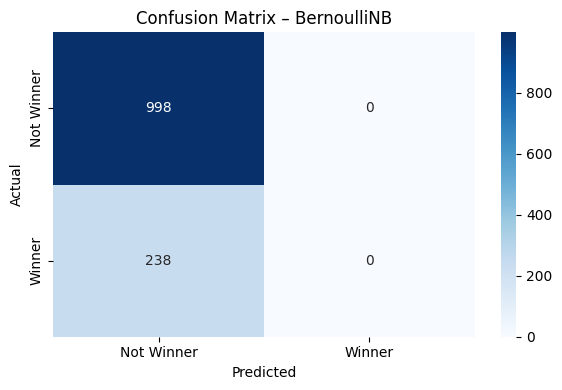

In [9]:
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Winner", "Winner"],
            yticklabels=["Not Winner", "Winner"])
plt.title("Confusion Matrix – BernoulliNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Categorical Naïve Bayes

In [10]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()

cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)

print("CategoricalNB Accuracy:", accuracy_score(y_test, y_pred_cnb))
print(confusion_matrix(y_test, y_pred_cnb))
print(classification_report(y_test, y_pred_cnb))

CategoricalNB Accuracy: 0.8001618122977346
[[973  25]
 [222  16]]
              precision    recall  f1-score   support

       False       0.81      0.97      0.89       998
        True       0.39      0.07      0.11       238

    accuracy                           0.80      1236
   macro avg       0.60      0.52      0.50      1236
weighted avg       0.73      0.80      0.74      1236



**Confusion Matrix for CategoricalNB**

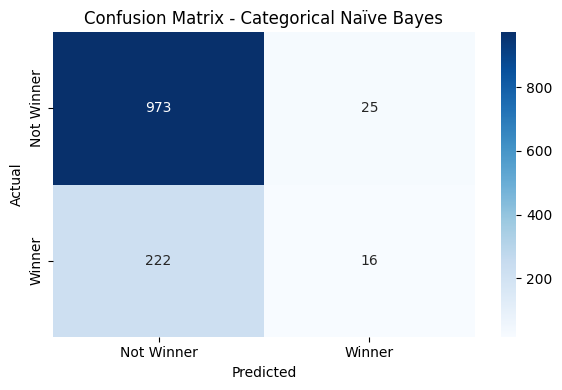

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_cnb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Winner", "Winner"],
            yticklabels=["Not Winner", "Winner"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Categorical Naïve Bayes")
plt.tight_layout()
plt.show()

In [12]:
results = {
    "Model": ["MultinomialNB", "BernoulliNB", "CategoricalNB"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_mnb),
        accuracy_score(y_test, y_pred_bnb),
        accuracy_score(y_test, y_pred_cnb)
    ]
}

pd.DataFrame(results)

,Model,Accuracy
0,MultinomialNB,0.778317
1,BernoulliNB,0.807443
2,CategoricalNB,0.800162
